In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [64]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from model_equations_separate_NC_sep_vmax import *

In [66]:
import run_sensitivity

In [67]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [105]:
morder = ['MIN', 'LEAK', 'MIXO']
mpalette = sns.color_palette(palette='gist_stern', n_colors=3)
mpalette

In [69]:
gorder = [ 'Sustained', 'Strong', 'Inhibited',]
gpalette = sns.color_palette('Accent', n_colors=3).as_hex()
gpalette

['#7fc97f', '#beaed4', '#fdc086']

In [70]:
refdf = pd.read_excel('reference_10cc.xlsx')
ref99df = pd.read_excel( 'reference_pro99_axenic.xlsx')

In [71]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results/PONLY'

os.listdir(dpath)

['param_sensitivity_pro99_sum.csv.gz',
 'vpro_sum.csv.gz',
 'least_square_LEAK_sum.csv.gz',
 'sensitivity_df.csv.gz',
 'least_square_MIN_sum.csv.gz',
 'baseline_df.csv.gz',
 'param_sensitivity_pro99_mse.csv.gz',
 'baseline_sum.csv.gz',
 'least_square_MIN_df.csv.gz',
 'sensitivity_sum.csv.gz',
 'vpro_mse.csv.gz',
 'least_square_LEAK_df.csv.gz',
 'sensitivity_mse.csv.gz',
 'least_square_MIN_lsq.csv.gz',
 'param_sensitivity_pro99_df.csv.gz',
 'vpro_df.csv.gz',
 'least_square_LEAK_lsq.csv.gz',
 'baseline_mse.csv.gz']

In [72]:
basesum_df = pd.read_csv(os.path.join(dpath,'baseline_sum.csv.gz' ))
basedf =  pd.read_csv(os.path.join(dpath,'baseline_df.csv.gz' ))
basemse_df = pd.read_csv(os.path.join(dpath,'baseline_mse.csv.gz' ))

In [73]:
vprosum_df = pd.read_csv(os.path.join(dpath,'vpro_sum.csv.gz' ))
vprodf =  pd.read_csv(os.path.join(dpath,'vpro_df.csv.gz' ))
vpromse_df = pd.read_csv(os.path.join(dpath,'vpro_mse.csv.gz' ))

In [74]:
# remove outlier
vprosum_df = vprosum_df.loc[~vprosum_df.run_id.isin(['vpro_ponly_pro99_least_square_LEAK_20'])]
vprodf = vprodf.loc[~vprodf.run_id.isin(['vpro_ponly_pro99_least_square_LEAK_20'])]
vpromse_df = vpromse_df.loc[~vpromse_df.run_id.isin(['vpro_ponly_pro99_least_square_LEAK_20'])]


In [75]:

base1sum_df = basesum_df.loc[~basesum_df.run_id.str.contains('pro99')].copy()
base1df = basedf.loc[~basedf.run_id.str.contains('pro99')].copy()
base1mse_df = basemse_df.loc[~basemse_df.run_id.str.contains('pro99')].copy()

vpro1sum_df = vprosum_df.loc[~vprosum_df.run_id.str.contains('pro99')].copy()
vpro1df = vprodf.loc[~vprodf.run_id.str.contains('pro99')].copy()
vpro1mse_df = vpromse_df.loc[~vpromse_df.run_id.str.contains('pro99')].copy()


In [76]:

base2sum_df = basesum_df.loc[basesum_df.run_id.str.contains('pro99')].copy()
base2df = basedf.loc[basedf.run_id.str.contains('pro99')].copy()
base2mse_df = basemse_df.loc[basemse_df.run_id.str.contains('pro99')].copy()

vpro2sum_df = vprosum_df.loc[vprosum_df.run_id.str.contains('pro99')].copy()
vpro2df = vprodf.loc[vprodf.run_id.str.contains('pro99')].copy()
vpro2mse_df = vpromse_df.loc[vpromse_df.run_id.str.contains('pro99')].copy()


# baseline and vpro dfs

In [77]:
base1df.run_id.unique()

array(['baseline_ponly_FULL', 'baseline_ponly_LEAK',
       'baseline_ponly_MIXO', 'baseline_ponly_MIN'], dtype=object)

In [78]:
vpro1df[['idx', 'model', 'f_scale']] = vpro1df.run_id.str.split('_', expand=True)[[0,4,5]]
vpro1mse_df[['idx', 'model', 'f_scale']] = vpro1mse_df.run_id.str.split('_', expand=True)[[0,4,5]]
vpro1sum_df[['idx', 'model', 'f_scale']] = vpro1sum_df.run_id.str.split('_', expand=True)[[0,4,5]]


In [79]:
vpro2df[['idx', 'model', 'f_scale']] = vpro2df.run_id.str.split('_', expand=True)[[0,5,6]]
vpro2mse_df[['idx', 'model', 'f_scale']] = vpro2mse_df.run_id.str.split('_', expand=True)[[0,5,6]]
vpro2sum_df[['idx', 'model', 'f_scale']] = vpro2sum_df.run_id.str.split('_', expand=True)[[0,5,6]]


In [80]:
vpro1mse_df.idx.unique()

array(['vpro'], dtype=object)

In [81]:
base1df[['idx', 'model']] = base1df.run_id.str.split('_', expand=True)[[0,2]]
base1mse_df[['idx',  'model']] = base1mse_df.run_id.str.split('_', expand=True)[[0,2]]
base1sum_df[['idx',  'model']] = base1sum_df.run_id.str.split('_', expand=True)[[0,2]]


In [82]:
base2df[['idx', 'model']] = base2df.run_id.str.split('_', expand=True)[[0,3]]
base2mse_df[['idx',  'model']] = base2mse_df.run_id.str.split('_', expand=True)[[0,3]]
base2sum_df[['idx',  'model']] = base2sum_df.run_id.str.split('_', expand=True)[[0,3]]


In [83]:
base1mse_df.model.unique(),base2mse_df.model.unique(),

(array(['FULL', 'MIXO', 'MIN', 'LEAK'], dtype=object),
 array(['MIN', 'LEAK', 'MIXO', 'FULL'], dtype=object))

In [84]:
vpro1df['Media'] = 'lowN'
vpro1mse_df['Media'] = 'lowN'
vpro1sum_df['Media'] = 'lowN'
base1df['Media'] = 'lowN'
base1mse_df['Media'] = 'lowN'
base1sum_df['Media'] = 'lowN'


In [85]:
vpro2df['Media'] = 'highN'
vpro2mse_df['Media'] = 'highN'
vpro2sum_df['Media'] = 'highN'
base2df['Media'] = 'highN'
base2mse_df['Media'] = 'highN'
base2sum_df['Media'] = 'highN'


In [86]:
base1mse_df.idx.unique()

array(['baseline'], dtype=object)

In [87]:
df = pd.concat([base1df, vpro1df, base2df, vpro2df], ignore_index=True)
mse_df = pd.concat([base1mse_df, vpro1mse_df, base2mse_df, vpro2mse_df], ignore_index=True)
sum_df = pd.concat([base1sum_df, vpro1sum_df, base2sum_df, vpro2sum_df], ignore_index=True)


In [88]:
mse_df.idx.unique()

array(['baseline', 'vpro'], dtype=object)

In [89]:
mse_df.run_id.value_counts()

baseline_ponly_FULL                        3
baseline_ponly_pro99_MIN                   3
baseline_ponly_pro99_MIXO                  3
baseline_ponly_pro99_FULL                  3
vpro_ponly_pro99_least_square_MIXO_1       3
vpro_ponly_pro99_least_square_MIXO_20      3
vpro_ponly_pro99_least_square_MIXO_10      3
vpro_ponly_pro99_least_square_MIXO_0.1     3
vpro_ponly_pro99_least_square_LEAK_0.1     3
vpro_ponly_pro99_least_square_MIN_1        3
vpro_ponly_pro99_least_square_LEAK_1       3
vpro_ponly_pro99_least_square_MIN_100      3
vpro_ponly_pro99_least_square_LEAK_0.01    3
vpro_ponly_pro99_least_square_MIN_0.1      3
vpro_ponly_pro99_least_square_MIN_20       3
vpro_ponly_pro99_least_square_LEAK_10      3
vpro_ponly_pro99_least_square_LEAK_100     3
vpro_ponly_pro99_least_square_MIN_10       3
vpro_ponly_pro99_least_square_MIN_0.01     3
baseline_ponly_pro99_LEAK                  3
vpro_ponly_least_square_LEAK_1             3
baseline_ponly_MIXO                        3
vpro_ponly

In [90]:
mse_df.columns

Index(['Sample', 'full name', 'Group', 'compare_points', 'MSE', 'run_id',
       'idx', 'model', 'Media', 'f_scale'],
      dtype='object')

In [91]:
mse_df.idx.value_counts()

vpro        99
baseline    24
Name: idx, dtype: int64

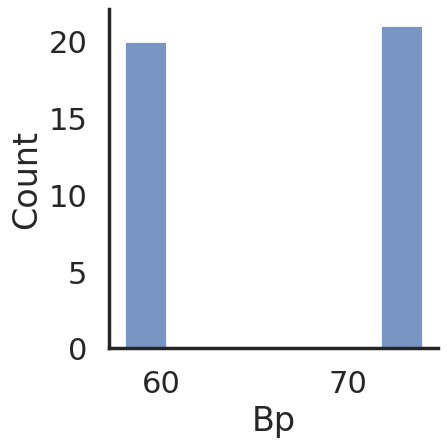

In [92]:
sns.displot(df.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [93]:
mse_df.nlargest(columns='MSE', n=20)

,Sample,full name,Group,compare_points,MSE,run_id,idx,model,Media,f_scale
71,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,61946.444196,baseline_ponly_pro99_MIXO,baseline,MIXO,highN,NaN
70,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,60259.822045,baseline_ponly_pro99_MIXO,baseline,MIXO,highN,NaN
69,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,59117.262419,baseline_ponly_pro99_MIXO,baseline,MIXO,highN,NaN
65,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,13577.856371,baseline_ponly_pro99_MIN,baseline,MIN,highN,NaN
64,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,12669.362957,baseline_ponly_pro99_MIN,baseline,MIN,highN,NaN
63,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,12330.590162,baseline_ponly_pro99_MIN,baseline,MIN,highN,NaN
66,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,8223.519891,baseline_ponly_pro99_LEAK,baseline,LEAK,highN,NaN
67,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,7745.919261,baseline_ponly_pro99_LEAK,baseline,LEAK,highN,NaN
68,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,7198.016237,baseline_ponly_pro99_LEAK,baseline,LEAK,highN,NaN
74,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,3784.205569,baseline_ponly_pro99_FULL,baseline,FULL,highN,NaN


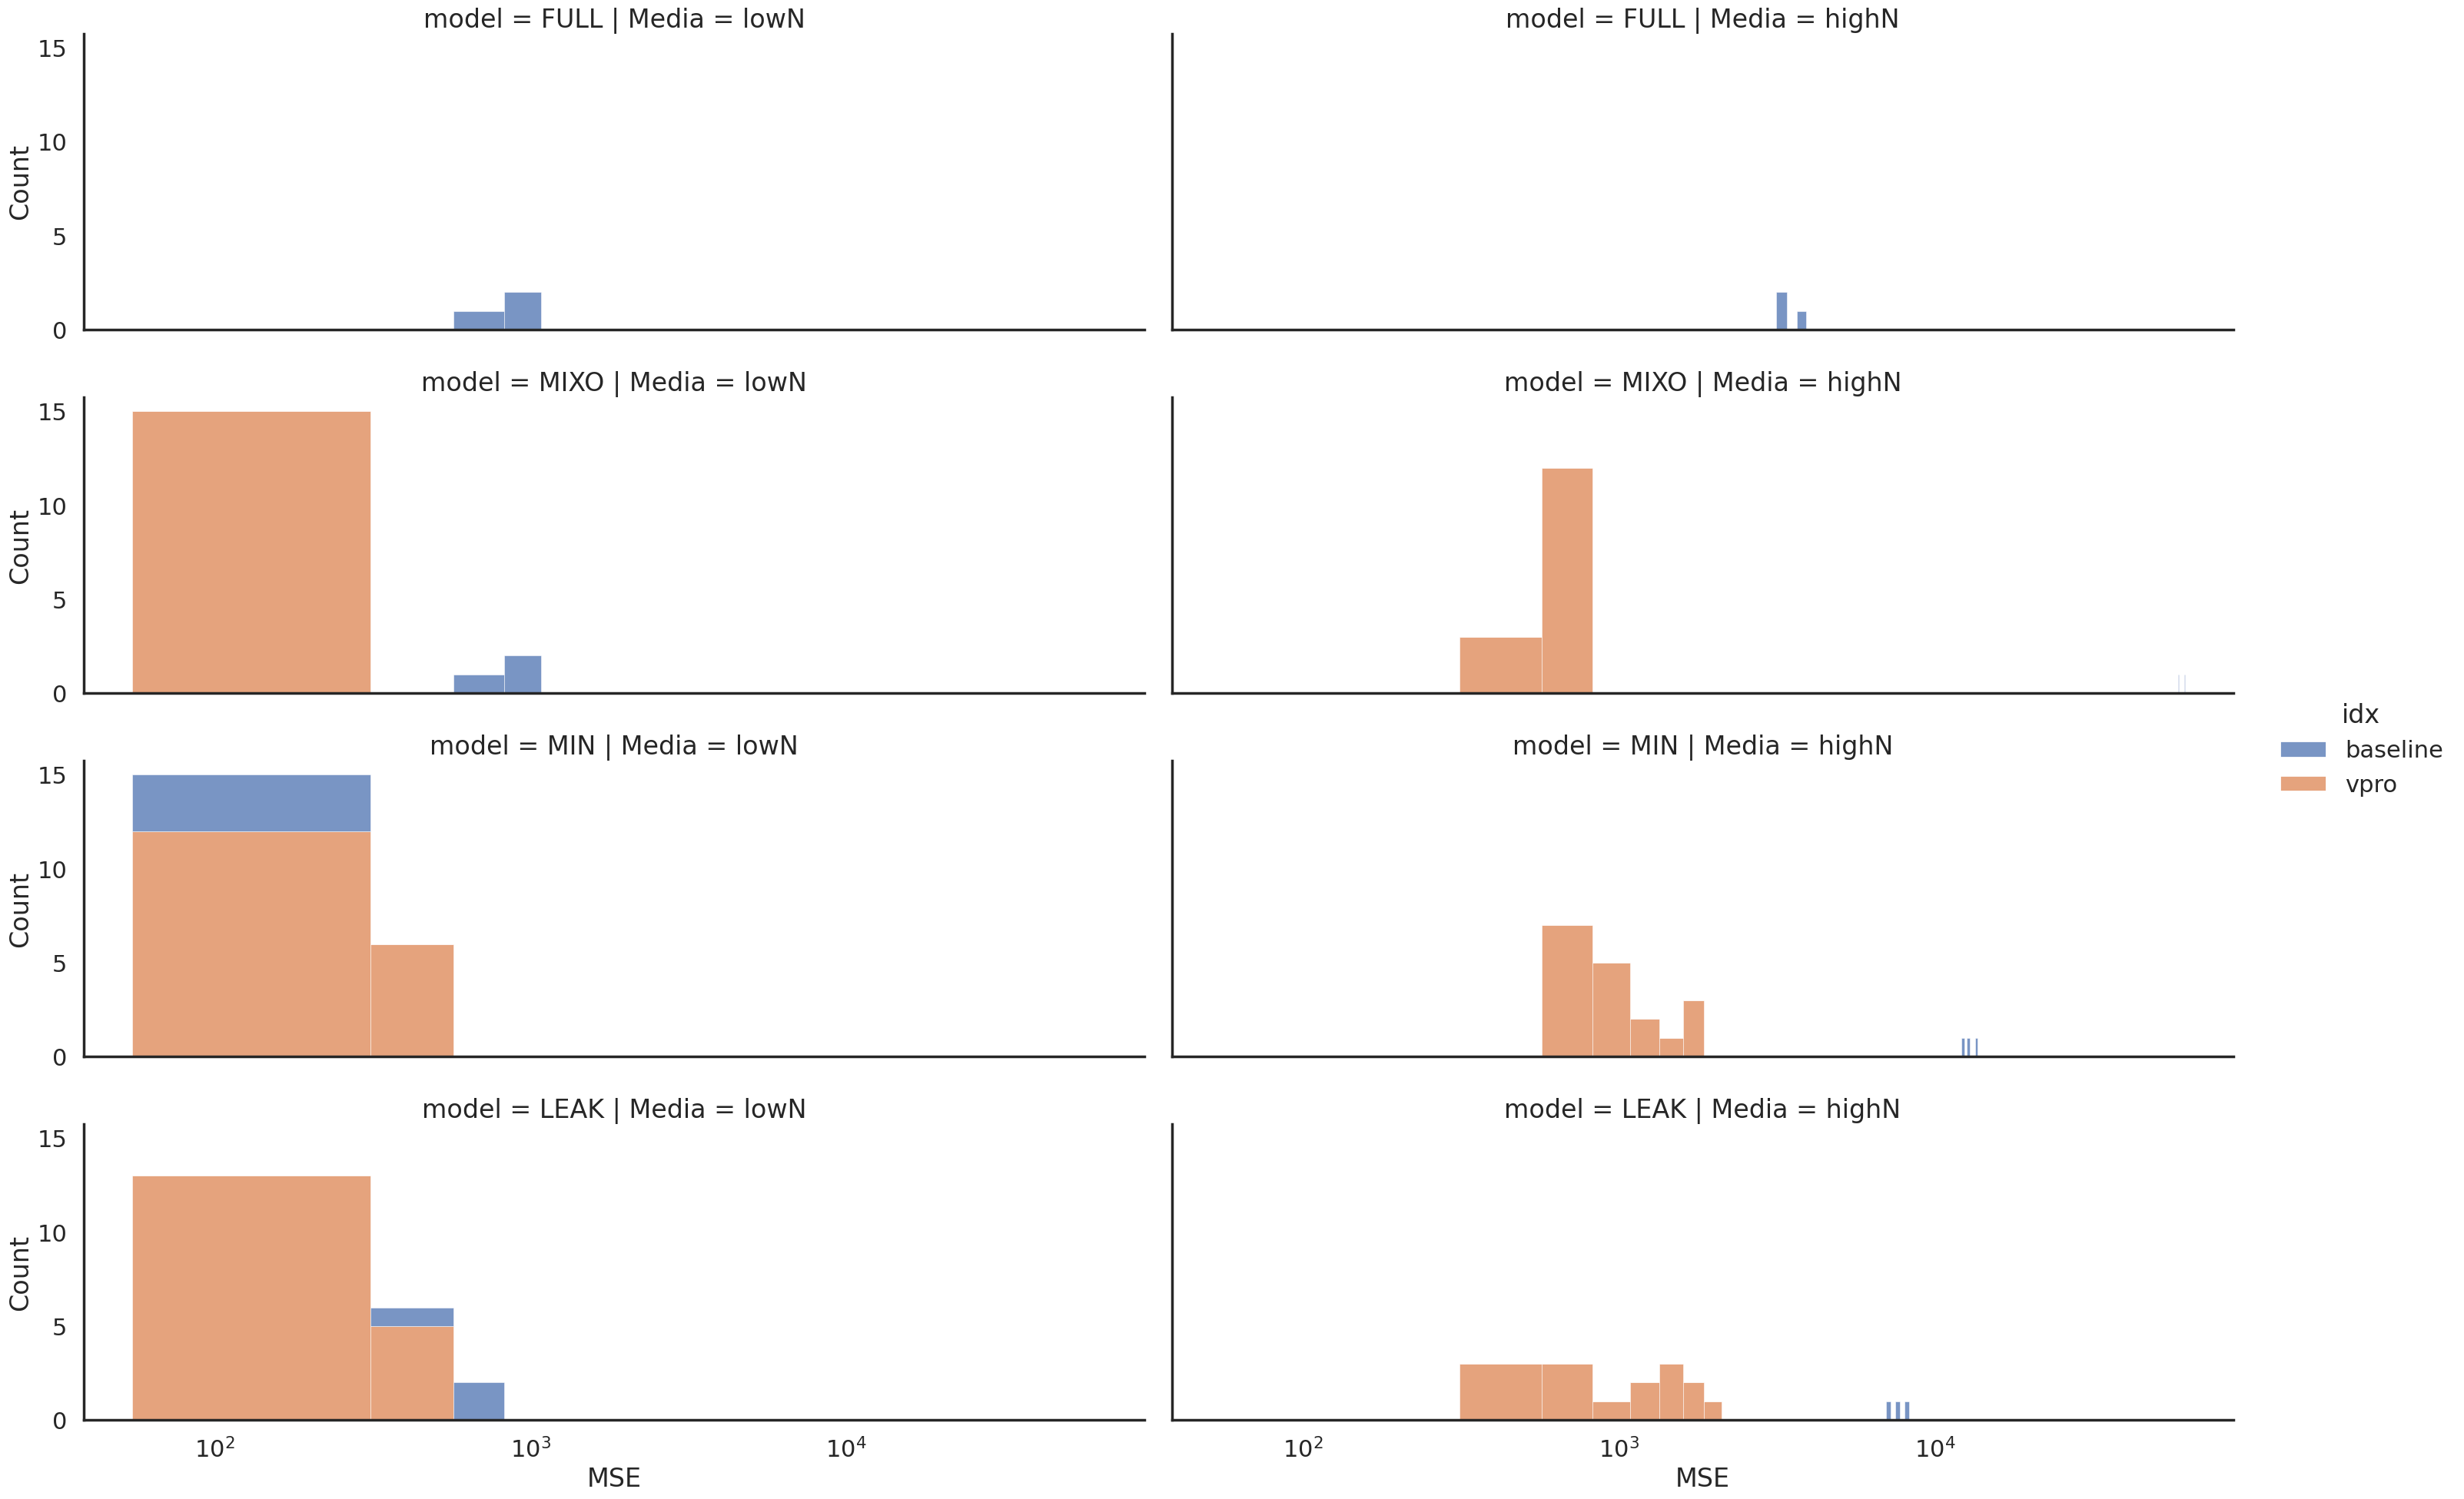

In [94]:
sns.displot(mse_df, x='MSE',aspect=3, row='model', hue='idx',multiple='stack' ,  col='Media')
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [95]:
df.min()

/tmp/ipykernel_1496445/3962516015.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


Bp                        0.0
DON                  0.002532
RDON                      0.0
DIN                  0.000148
DOC                     132.5
RDOC                      0.0
DIC                  0.002388
ROS                  0.055182
ABp                       0.0
ABh                       0.0
t                         0.0
day                       0.0
Bp[C]                     0.0
ABp[C]                    0.0
ABh[C]                    0.0
run_id    baseline_ponly_FULL
idx                  baseline
model                    FULL
Media                   highN
dtype: object

In [96]:
mse_df.idx.value_counts()

vpro        99
baseline    24
Name: idx, dtype: int64

In [97]:
sns.color_palette('Dark2')

In [98]:
model_name = 'MIN'
mpalette = sns.color_palette('Dark2', n_colors=3)
morder = ['sensitivity', 'baseline', 'vpro']
sensitivity_color= mpalette[0]
baseline_color= mpalette[1]
vpro_color= mpalette[2]

#all_df = pd.concat([df, basedf, vprodf], ignore_index=True)
min_porder = ['VmaxINp', 'KINp', 'VmaxICp', 'KICp', 'Mp', 'gammaDp']

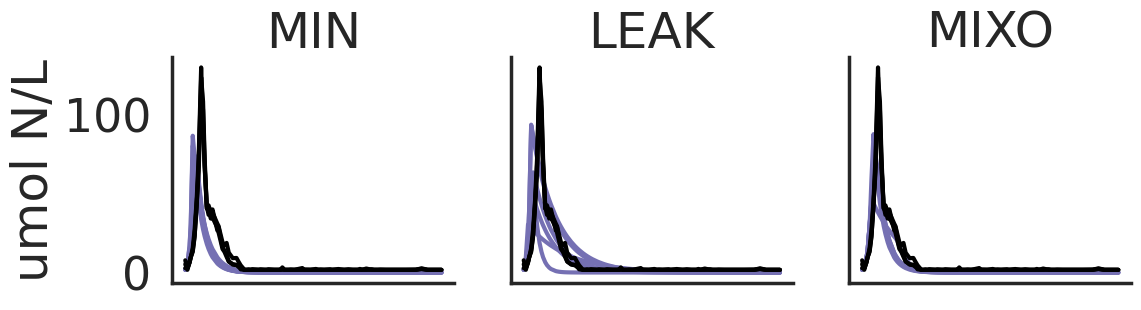

In [99]:
#base_df['model_'] = base_df['model_']
sns.set_context('poster', font_scale=1.5)
g = sns.relplot(
    data=df.loc[df.idx.isin(['vpro']) & df.Media.isin(['lowN'])],
    x='day', y='Bp', col='model', col_order=['MIN', 'LEAK', 'MIXO'],
    estimator=None, units='run_id', kind='line',
    hue= 'idx', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
    aspect=0.8,
)
for ax in g.axes_dict.values():
    sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', ax=ax
    )
g.set_titles(col_template='{col_name}',)
g.set(ylabel='umol N/L', xlabel='', xticks=[])


In [104]:
df.loc[df.idx.isin(['vpro']) ]

,Bp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,ABh,t,day,Bp[C],ABp[C],ABh[C],run_id,idx,model,Media,f_scale
296,1.785714,20.000000,0.000000,100.000000,132.500000,0.000000,2241.552301,0.200000,0.0,0.0,0.0,0.000000,12.500000,0.0,0.0,vpro_ponly_least_square_MIN_0.01,vpro,MIN,lowN,0.01
297,5.390597,20.691811,0.079144,95.624162,137.342674,0.554009,2212.302273,0.197848,0.0,0.0,93480.0,1.081944,37.734182,0.0,0.0,vpro_ponly_least_square_MIN_0.01,vpro,MIN,lowN,0.01
298,16.268061,22.781407,0.318197,82.418048,151.969852,2.227381,2127.178590,0.195717,0.0,0.0,187020.0,2.164583,113.876430,0.0,0.0,vpro_ponly_least_square_MIN_0.01,vpro,MIN,lowN,0.01
299,29.439153,25.317177,0.608293,66.421092,169.720238,4.258052,2025.034871,0.194580,0.0,0.0,237360.0,2.747222,206.074068,0.0,0.0,vpro_ponly_least_square_MIN_0.01,vpro,MIN,lowN,0.01
300,80.212994,35.386042,1.760187,4.426492,240.202293,12.321306,1631.697035,0.192631,0.0,0.0,324360.0,3.754167,561.490960,0.0,0.0,vpro_ponly_least_square_MIN_0.01,vpro,MIN,lowN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0.000222,739.384295,82.298655,0.102543,5168.190065,576.090583,2238.189235,0.089810,0.0,0.0,6917400.0,80.062500,0.001553,0.0,0.0,vpro_ponly_pro99_least_square_MIN_0.01,vpro,MIN,highN,0.01
2710,0.000095,739.384409,82.298668,0.102543,5168.190860,576.090673,2239.313365,0.086402,0.0,0.0,7251600.0,83.930556,0.000667,0.0,0.0,vpro_ponly_pro99_least_square_MIN_0.01,vpro,MIN,highN,0.01
2711,0.000063,739.384437,82.298671,0.102543,5168.191060,576.090696,2239.712361,0.084805,0.0,0.0,7412820.0,85.796528,0.000444,0.0,0.0,vpro_ponly_pro99_least_square_MIN_0.01,vpro,MIN,highN,0.01
2712,0.000017,739.384479,82.298676,0.102543,5168.191354,576.090730,2240.586293,0.079766,0.0,0.0,7942080.0,91.922222,0.000117,0.0,0.0,vpro_ponly_pro99_least_square_MIN_0.01,vpro,MIN,highN,0.01


In [108]:
df.model.unique()

array(['FULL', 'LEAK', 'MIXO', 'MIN'], dtype=object)

/home/oweissberg/work/tools/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


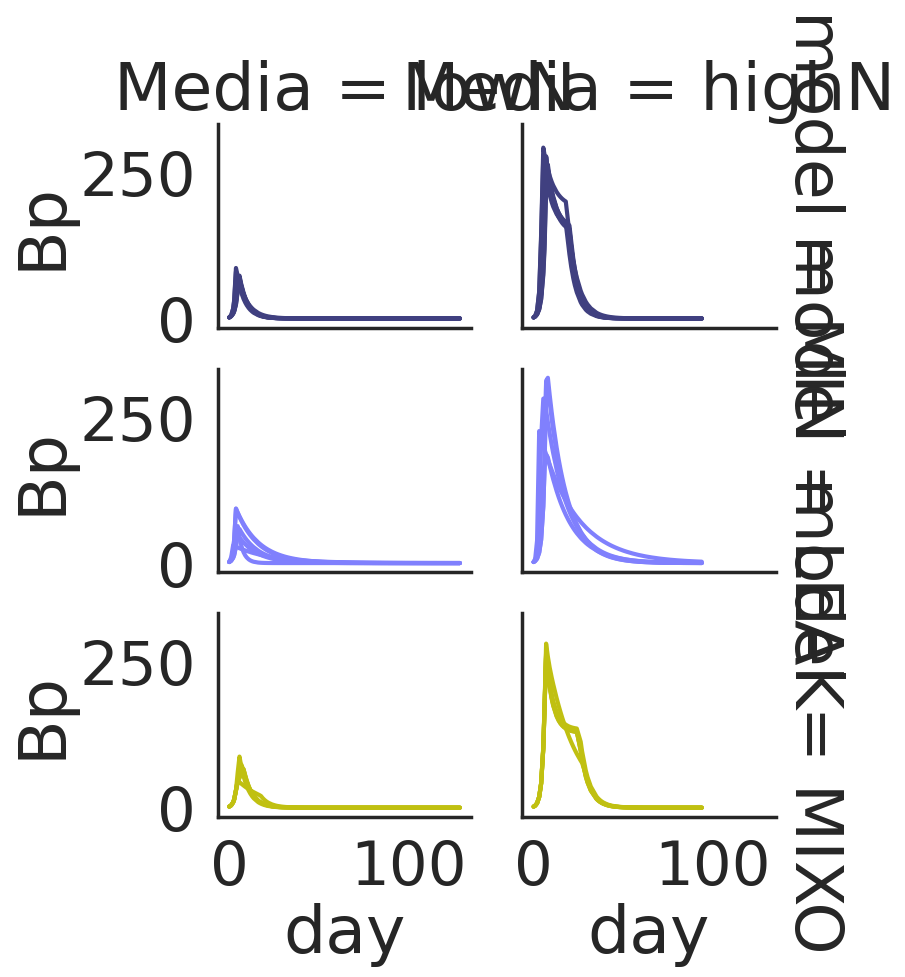

In [109]:
g = sns.relplot(
    data=df.loc[df.idx.isin(['vpro']) ],
    x='day', y='Bp', row='model', row_order=morder,
    col='Media',
    estimator=None, units='run_id', kind='line',
    hue= 'model', hue_order=morder, 
    palette=mpalette, legend=False, 
    aspect=1.2, height=3,
    facet_kws=dict(margin_titles=True)
)


In [110]:
g.axes_dict

{('MIN', 'lowN'): <Axes: title={'center': 'Media = lowN'}, ylabel='Bp'>,
 ('MIN', 'highN'): <Axes: title={'center': 'Media = highN'}>,
 ('LEAK', 'lowN'): <Axes: ylabel='Bp'>,
 ('LEAK', 'highN'): <Axes: >,
 ('MIXO', 'lowN'): <Axes: xlabel='day', ylabel='Bp'>,
 ('MIXO', 'highN'): <Axes: xlabel='day'>}

/home/oweissberg/work/tools/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


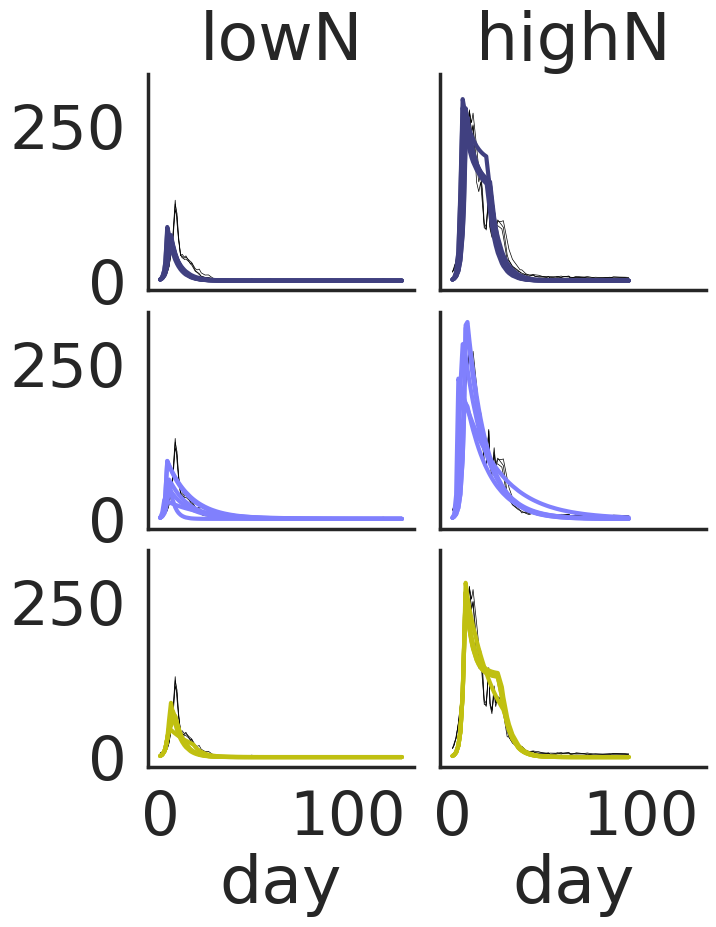

In [114]:
#base_df['model_'] = base_df['model_']
sns.set_context('poster', font_scale=2)
g = sns.relplot(
    data=df.loc[df.idx.isin(['vpro']) ],
    x='day', y='Bp', row='model', row_order=morder,
    col='Media',
    estimator=None, units='run_id', kind='line',
    hue= 'model', hue_order=morder, 
    palette=mpalette, legend=False, 
    aspect=1.2, height=3,
    facet_kws=dict(margin_titles=True)
)
for (model, media), ax in g.axes_dict.items():
    if media == 'lowN':
        rdf = refdf.loc[refdf.Group.isin(['Axenic'])]
    else:
        rdf = ref99df
    sns.lineplot(
            data=rdf,
        x='day', y='ref_Bp', lw=0.5, zorder=1,
        estimator=None, units='Sample',
        color='black', ax=ax
    )
#g.set_titles(col_template='{col_name}',)
g.set_titles(row_template='',col_template='{col_name}',)
g.set(ylabel='umol N/L')
g.set(ylabel='')
#g.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)

In [118]:
mse_df['RMSE'] = np.sqrt(mse_df.MSE)
mse_df.loc[mse_df.idx.isin(['vpro'])].groupby(['model', 'Media']).RMSE.describe()

count       mean       std        min        25%        50%  \
model Media                                                                
LEAK  highN   15.0  32.168868  8.067333  22.291584  24.195280  34.134891   
      lowN    18.0  16.724584  2.718804  12.448091  15.253414  16.178950   
MIN   highN   18.0  31.814987  5.386665  26.574949  27.530191  30.161278   
      lowN    18.0  16.806825  1.594455  14.847922  15.612729  16.188350   
MIXO  highN   15.0  25.330284  2.711778  19.564755  24.821729  25.494411   
      lowN    15.0  12.272811  1.769030  10.413314  10.664230  11.389942   

                   75%        max  
model Media                        
LEAK  highN  37.899829  44.703427  
      lowN   18.121421  22.003221  
MIN   highN  35.442151  41.600285  
      lowN   17.989932  19.989443  
MIXO  highN  27.638302  28.442916  
      lowN   14.002900  14.990219

In [119]:
mse_df['RMSE'] = np.sqrt(mse_df.MSE)
mse_df.loc[mse_df.idx.isin(['vpro'])].groupby([
    'Media']).RMSE.describe()

,count,mean,std,min,25%,50%,75%,max
Media,,,,,,,,
highN,48.0,29.899105,6.464030,19.564755,25.321639,28.143260,34.882199,44.703427
lowN,51.0,15.444265,2.920581,10.413314,13.757088,15.725491,16.807611,22.003221


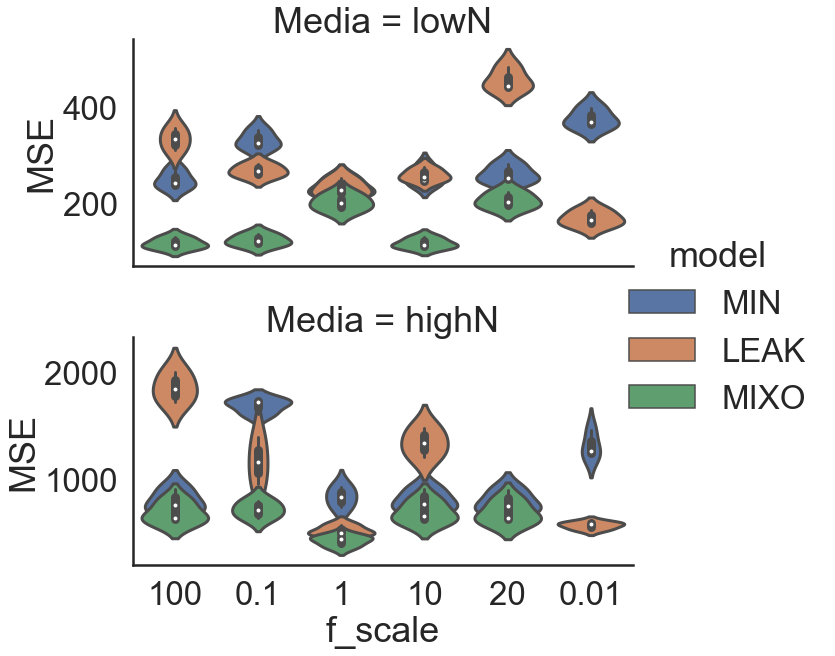

In [113]:
sns.catplot(
    data=mse_df.loc[mse_df.idx.isin(['vpro'])],
    x='f_scale', y='MSE', aspect=2, hue='model', row='Media', 
    sharey=False, kind='violin', dodge=False
)

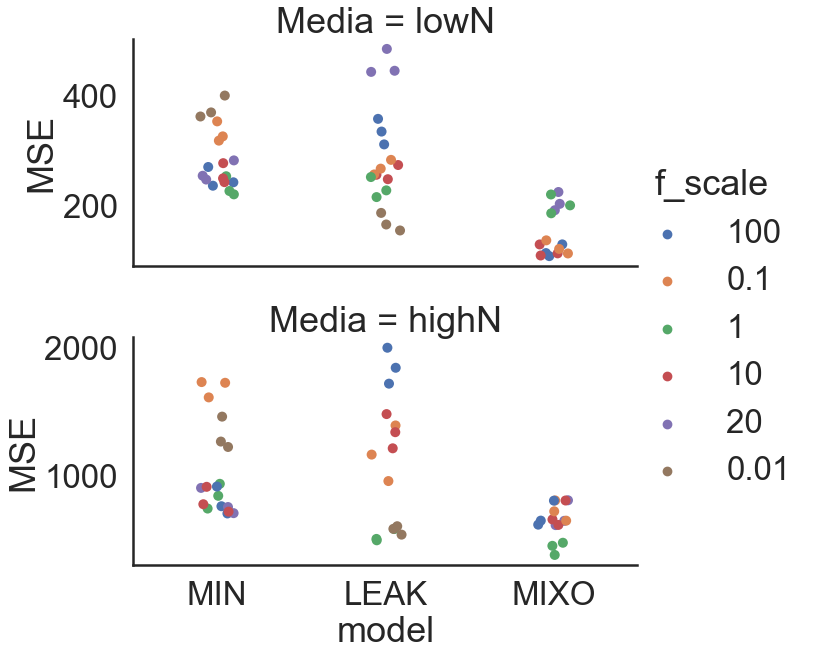

In [119]:
sns.catplot(
    data=mse_df.loc[mse_df.idx.isin(['vpro'])],
    hue='f_scale', y='MSE', aspect=2, x='model', row='Media', 
    sharey=False, s=10, #kind='violin', dodge=False
)

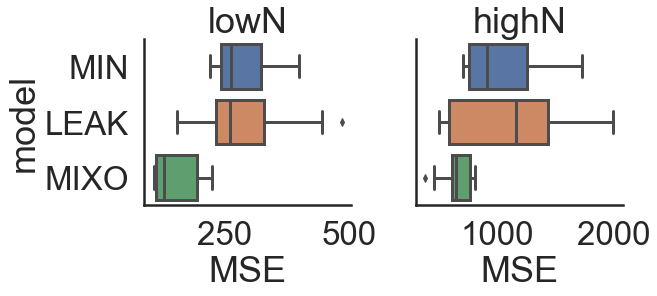

In [123]:
sns.catplot(
    data=mse_df.loc[mse_df.idx.isin(['vpro'])],
    y='model', x='MSE', aspect=1, col='Media',kind='box', dodge=False, sharex=False
).set_titles(col_template='{col_name}')

In [62]:
refdf.dtypes

day             float64
Sample           object
id                int64
replicate        object
transfer          int64
transfer day      int64
heterotroph      object
full name        object
FL              float64
Group            object
predicted       float64
ref_Bp          float64
LOD                bool
t               float64
dtype: object

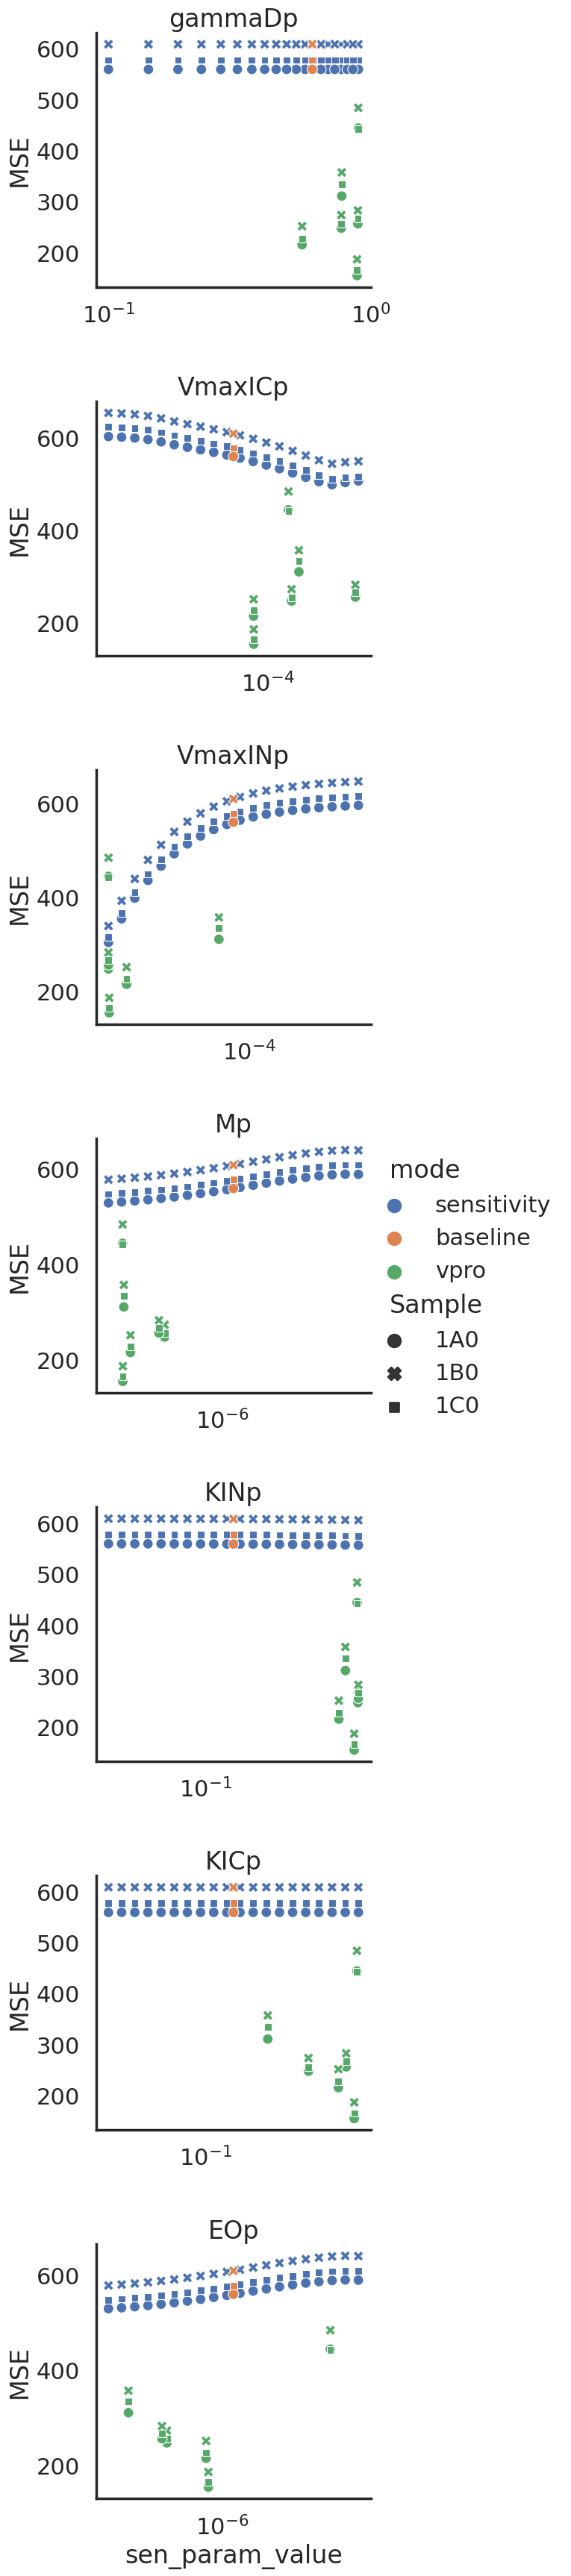

In [63]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

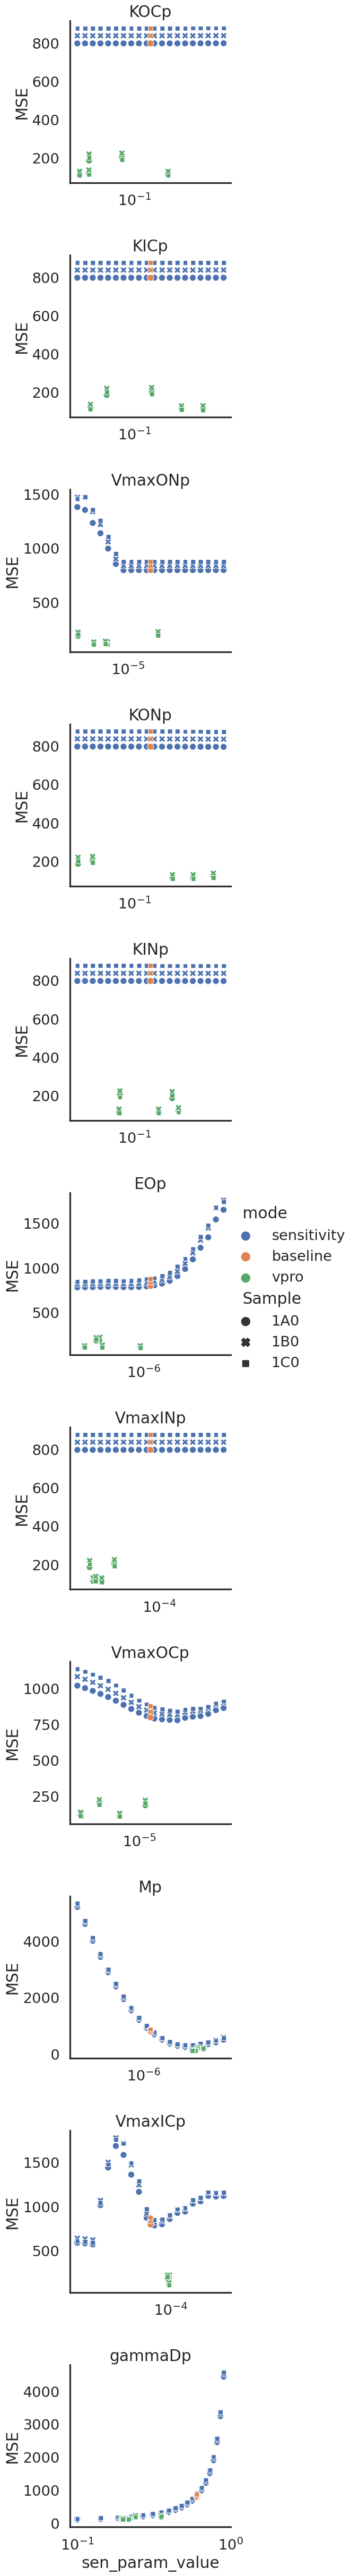

In [64]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIXO'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

In [65]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      27
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [66]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

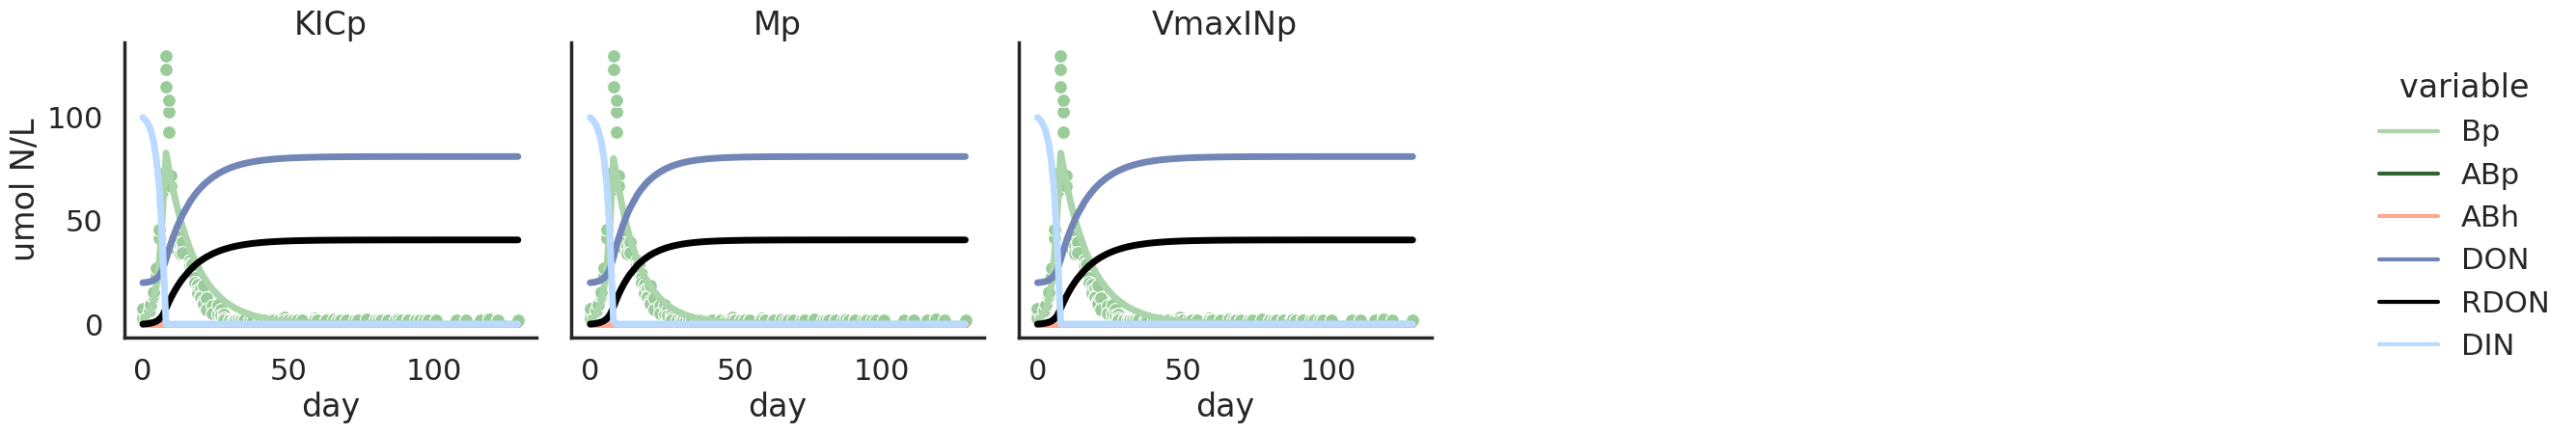

In [67]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [68]:
plt.show()

In [69]:
lowest_ids

933     param_sensitivity_ponly_MIN_Mp_10_h-6350224087...
2337    param_sensitivity_ponly_MIN_Mp_11_h-4005430513...
141     param_sensitivity_ponly_MIN_KICp_0_h-276366306...
1755    param_sensitivity_ponly_MIN_KICp_1_h5817399541...
261     param_sensitivity_ponly_MIN_KICp_2_h-587032821...
1359    param_sensitivity_ponly_MIN_KICp_3_h-642780311...
1599    param_sensitivity_ponly_MIN_KICp_4_h4268934620...
612     param_sensitivity_ponly_MIN_KICp_5_h2091062636...
2169    param_sensitivity_ponly_MIN_VmaxINp_0_h3827538...
1632    param_sensitivity_ponly_MIN_KICp_6_h-181862465...
Name: run_id, dtype: object